# Import some necessary libraries

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

# Viewing the Tiktok songs data

In [3]:
songsdata = pd.read_csv("Full_Dataset.csv")
songsdata

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,Year
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.72000,0.003140,0.0604,0.197,108.375,4,298933,2022
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.34200,0.001010,0.3110,0.662,173.930,4,167303,2022
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.35000,0.000000,0.1500,0.841,131.430,4,163026,2022
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.44000,0.000007,0.0921,0.531,80.870,4,238805,2022
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.09950,0.000000,0.3350,0.722,108.966,4,191822,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,Skinny Legend Anthem,Ava Louise,32,Skinny Legend Anthem,50,0.845,0.518,-7.568,1,11,0.2990,0.07030,0.000000,0.1220,0.443,129.951,4,135993,2019
964,Material Girl,Madonna,77,Celebration (double disc version),78,0.742,0.883,-3.419,1,0,0.0329,0.33300,0.000008,0.0964,0.978,136.506,4,240280,2019
965,I Wish - Radio Edit,Skee-Lo,51,I Wish,63,0.715,0.738,-10.139,1,7,0.1570,0.00826,0.000000,0.2600,0.573,97.877,4,252307,2019
966,Oh No I Got a Disease,Buss Crew,11,Oh No I Got a Disease,26,0.649,0.735,-4.365,0,10,0.7300,0.14600,0.000000,0.1240,0.845,86.704,5,134769,2019


### Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [4]:
print(songsdata.dtypes)

track_name           object
artist_name          object
artist_pop            int64
album                object
track_pop             int64
danceability        float64
energy              float64
loudness            float64
mode                  int64
key                   int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
duration_ms           int64
Year                  int64
dtype: object


### Firstly, we will remove all the variables with dtypes being objects, which means that they are string

In [5]:
## There are 3 columns named 'track_name', 'artist_name' and 'album' whose data type is string
clean_songsdata = songsdata.drop(columns=['track_name', 'artist_name', 'album'])
clean_songsdata

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,Year
0,81,95,0.629,0.547,-13.123,0,10,0.0550,0.72000,0.003140,0.0604,0.197,108.375,4,298933,2022
1,91,96,0.520,0.731,-5.338,0,6,0.0557,0.34200,0.001010,0.3110,0.662,173.930,4,167303,2022
2,73,44,0.768,0.716,-5.110,1,10,0.0404,0.35000,0.000000,0.1500,0.841,131.430,4,163026,2022
3,80,89,0.761,0.525,-6.900,1,11,0.0944,0.44000,0.000007,0.0921,0.531,80.870,4,238805,2022
4,81,92,0.836,0.743,-6.305,0,10,0.0656,0.09950,0.000000,0.3350,0.722,108.966,4,191822,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,32,50,0.845,0.518,-7.568,1,11,0.2990,0.07030,0.000000,0.1220,0.443,129.951,4,135993,2019
964,77,78,0.742,0.883,-3.419,1,0,0.0329,0.33300,0.000008,0.0964,0.978,136.506,4,240280,2019
965,51,63,0.715,0.738,-10.139,1,7,0.1570,0.00826,0.000000,0.2600,0.573,97.877,4,252307,2019
966,11,26,0.649,0.735,-4.365,0,10,0.7300,0.14600,0.000000,0.1240,0.845,86.704,5,134769,2019


In [6]:
print(clean_songsdata.dtypes)

artist_pop            int64
track_pop             int64
danceability        float64
energy              float64
loudness            float64
mode                  int64
key                   int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
duration_ms           int64
Year                  int64
dtype: object


# Now, we'll build some linear regression models to see which one is the best model to predict the popularity of the song


In [7]:
## Supported function :

def train_test_data( X , y ) :
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    # Linear Regression using Train Data
    linreg = LinearRegression()         
    linreg.fit(X_train, y_train)      

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Print the Coefficients against Predictors
    print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
    print()

    # Predict Response corresponding to Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'red', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'red', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    plt.show()

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

### First Model

Upon examining the data, it becomes evident that there is a slight strong relationship between "artist_pop" and "track_pop." This observation underscores a discernible reality in the music industry: the popularity of an artist plays a crucial role in the success of their new releases. The more well-known an artist is, the more likely their latest tracks are to achieve high levels of popularity, indicating that an artist's standing can significantly influence the reception of their music.

Response Variable : **Track_pop**     
Predictor Feature : **Artist_pop**       

$
\begin{aligned}
\text{Regression Model:} \quad \text{Track_pop }  = & \ a \times \text{Artist_pop} + b
\end{aligned}
$




Intercept of Regression 	: b =  [14.30712437]
Coefficients of Regression 	: a =  [[0.67994951]]

   Predictors  Coefficients
0  artist_pop       0.67995



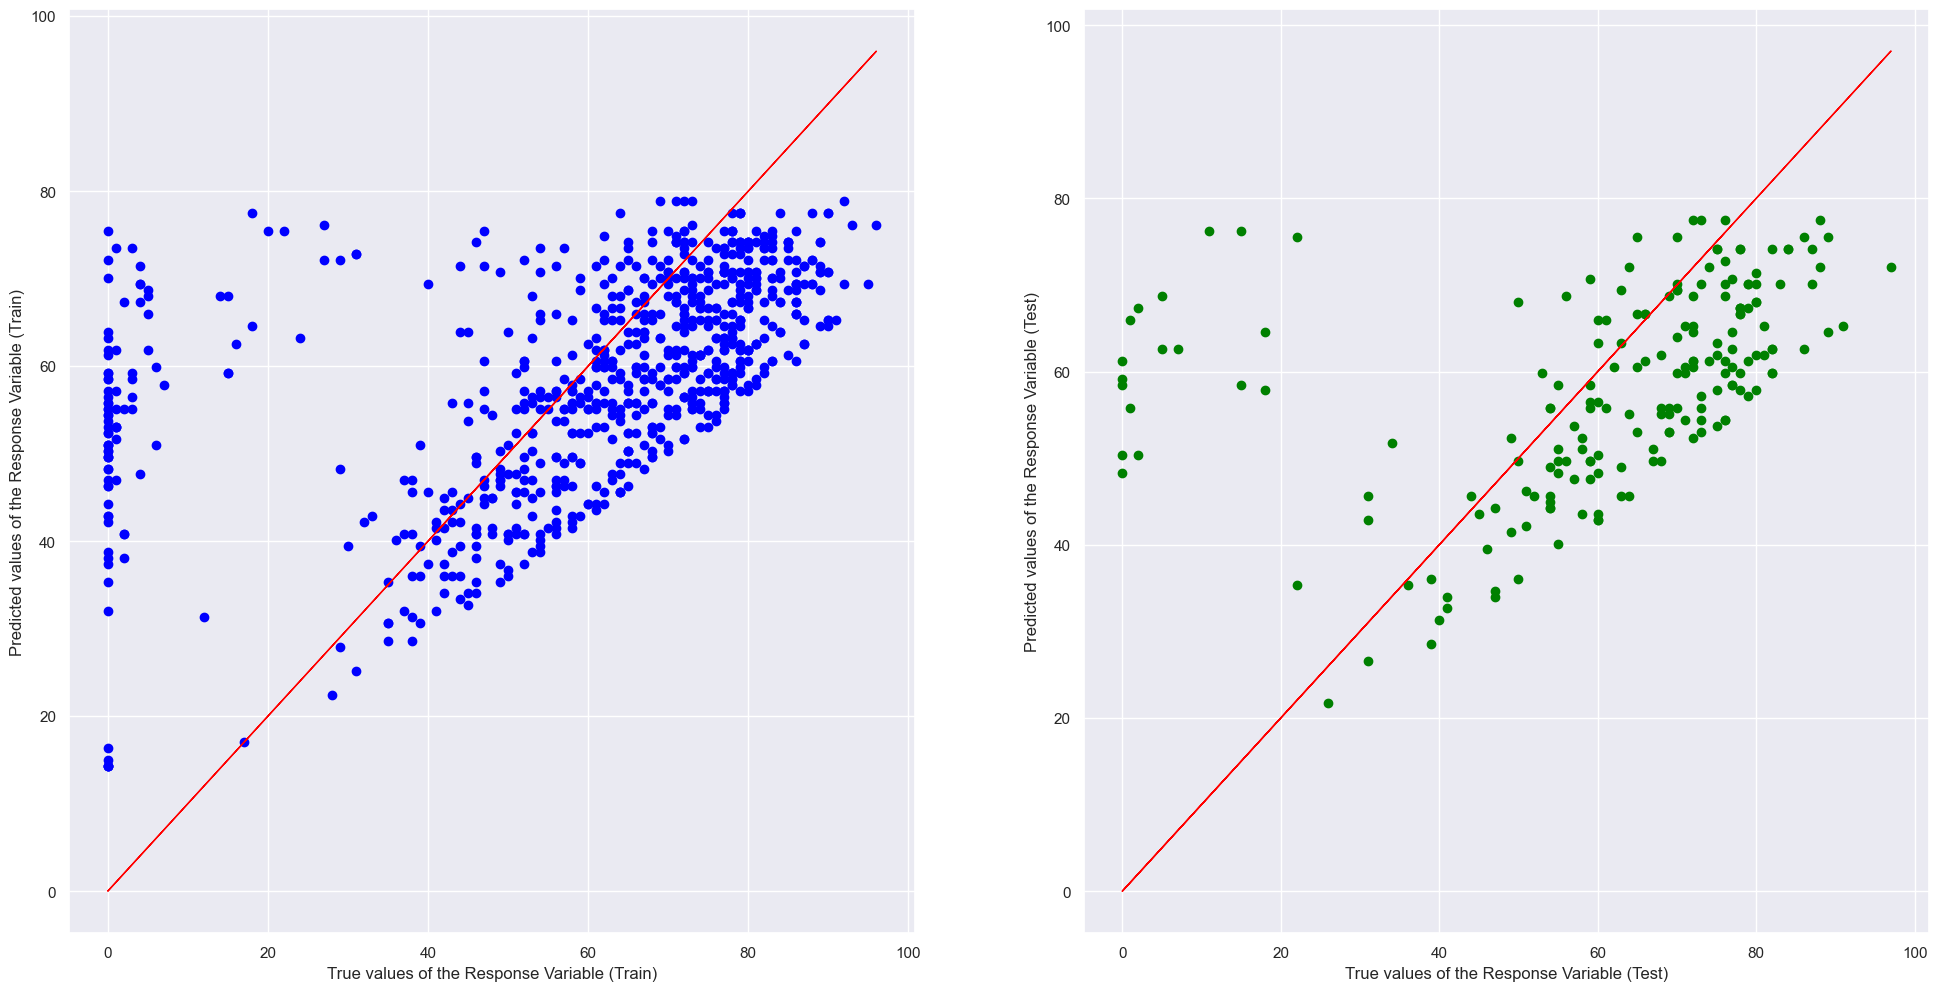

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2402486000861478
Mean Squared Error (MSE) 	: 460.27965278927604

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.11584106299358865
Mean Squared Error (MSE) 	: 424.33006476458075



In [8]:
np.random.seed(0)

# Extract Response and Predictors
y = pd.DataFrame(clean_songsdata["track_pop"])
X = pd.DataFrame(clean_songsdata["artist_pop"])

train_test_data( X , y )

### Second Model

Researches have shown that while an artist's popularity can drive a track's success, certain songs have gained widespread acclaim based solely on their musical qualities, such as melody, rhythm, and originality. 

Therefore, after examining the personal variable (e.g., artist_pop), let's now focus solely on musical variables to determine if the sound alone can achieve popularity. This approach will help us understand the intrinsic appeal of the music, independent of the artist's personal influence.

Response Variable : **Track_pop**     
Predictor Feature : **Danceability, Energy, Loudness, Mode, Key, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Time_signature, Duration_ms**       

$
\begin{aligned}
\text{Regression Model:} \quad \text{Track_pop } = & \ a_1 \times \text{Danceability} + a_2 \times \text{Energy} + a_3 \times \text{Loudness} + a_4 \times \text{Mode} \\& + a_5 \times \text{Key} + a_6 \times \text{Speechiness} + a_7 \times \text{Acousticness} + a_8 \times \text{Instrumentalness} \\& + a_{9} \times \text{Liveness} + a_{10} \times \text{Valence} + a_{11} \times \text{Tempo} + a_{12} \times \text{Time_signature} \\
&+ a_{13} \times \text{Duration_ms} + b
\end{aligned}
$

Intercept of Regression 	: b =  [95.67320909]
Coefficients of Regression 	: a =  [[-1.95559259e+01 -2.65897602e+01  2.74103083e+00 -1.16028331e+00
  -2.55638093e-01 -2.55615579e+01 -5.72385747e+00 -4.18465523e+00
  -1.25477185e+01  2.08447557e+00  8.16620337e-03  1.70507650e+00
   6.78130304e-05]]

          Predictors  Coefficients
0       danceability    -19.555926
1             energy    -26.589760
2           loudness      2.741031
3               mode     -1.160283
4                key     -0.255638
5        speechiness    -25.561558
6       acousticness     -5.723857
7   instrumentalness     -4.184655
8           liveness    -12.547719
9            valence      2.084476
10             tempo      0.008166
11    time_signature      1.705077
12       duration_ms      0.000068



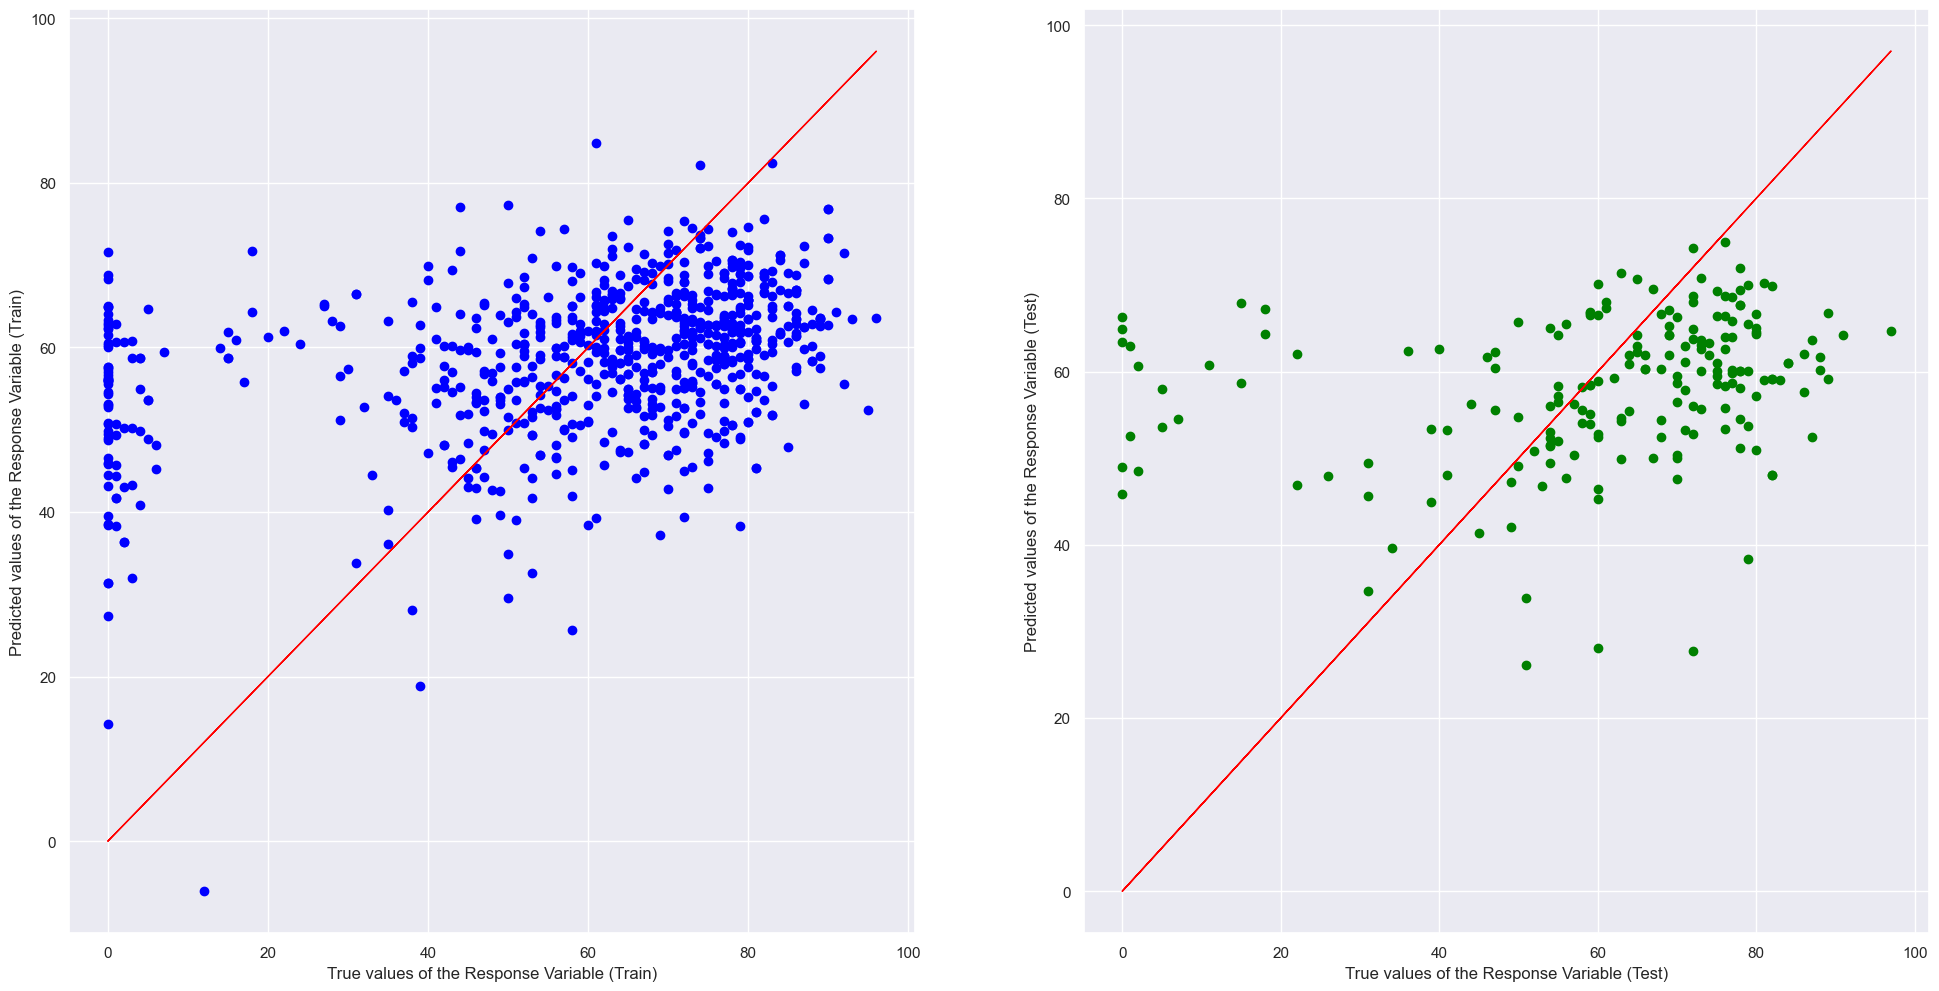

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.13871175541484604
Mean Squared Error (MSE) 	: 521.7936475195585

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.02361409375662904
Mean Squared Error (MSE) 	: 468.59210204247375



In [9]:
np.random.seed(0)

# Extract Response and Predictors
y = pd.DataFrame(clean_songsdata["track_pop"])
X = pd.DataFrame(clean_songsdata[["danceability", "energy", "loudness", "mode", "key", "speechiness", "acousticness", 
                            "instrumentalness", "liveness", "valence", "tempo", "time_signature", "duration_ms"]])
train_test_data( X , y )

### Third Model

Next, we aim to explore the full spectrum of variables that influence track popularity, deploying a comprehensive model to assess the predictive strength of both personal and musical factors. This approach will help us understand how these distinct elements interact and contribute to the overall success of a track.
   
Response Variable : **Track_pop**     
Predictor Feature : **Artist_pop, Danceability, Energy, Loudness, Mode, Key, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Time_signature, Duration_ms, Year**       

$
\begin{aligned}
\text{Regression Model:} \quad \text{Track_pop } = & \ a_1 \times \text{Artist_pop} + a_2 \times \text{Danceability} + a_3 \times \text{Energy} \\
&+ a_4 \times \text{Loudness} + a_5 \times \text{Mode} + a_6 \times \text{Key} + a_7 \times \text{Speechiness} \\
&+ a_8 \times \text{Acousticness} + a_9 \times \text{Instrumentalness} + a_{10} \times \text{Liveness} \\
&+ a_{11} \times \text{Valence} + a_{12} \times \text{Tempo} + a_{13} \times \text{Time_signature} \\
&+ a_{14} \times \text{Duration_ms} + a_{15} \times \text{Year} + b
\end{aligned}
$




Intercept of Regression 	: b =  [-2687.62644455]
Coefficients of Regression 	: a =  [[ 5.64881349e-01 -1.29337459e+01 -1.58711583e+01  1.44399690e+00
   2.37635758e-01 -2.25010073e-01 -1.43519169e+01 -4.88276521e+00
   6.22267669e-01 -8.11205298e+00  2.78829515e+00  1.38812992e-02
   2.79873143e+00  2.55254246e-05  1.34864221e+00]]

          Predictors  Coefficients
0         artist_pop      0.564881
1       danceability    -12.933746
2             energy    -15.871158
3           loudness      1.443997
4               mode      0.237636
5                key     -0.225010
6        speechiness    -14.351917
7       acousticness     -4.882765
8   instrumentalness      0.622268
9           liveness     -8.112053
10           valence      2.788295
11             tempo      0.013881
12    time_signature      2.798731
13       duration_ms      0.000026
14              Year      1.348642



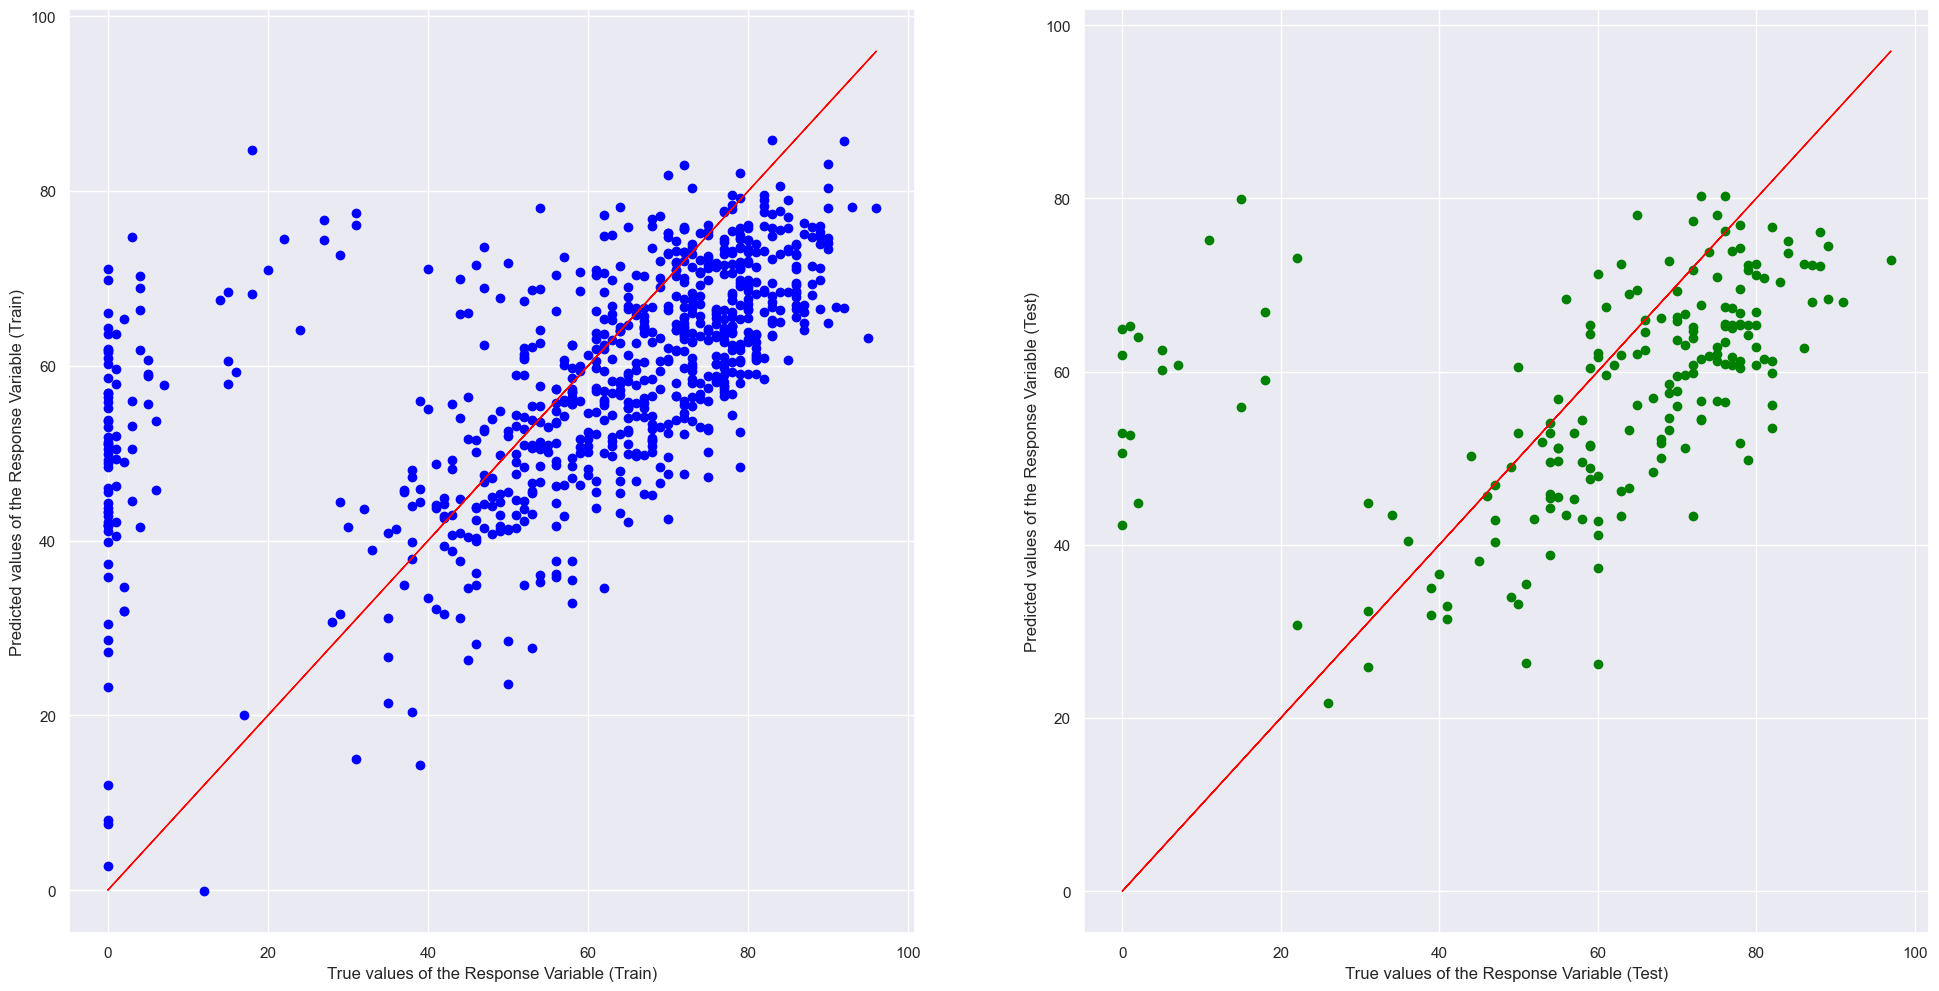

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2792180149459287
Mean Squared Error (MSE) 	: 436.67083977083996

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.12417290860721408
Mean Squared Error (MSE) 	: 420.33140293935674



In [10]:
np.random.seed(0)

# Extract Response and Predictors
y = pd.DataFrame(clean_songsdata["track_pop"])
X = pd.DataFrame(clean_songsdata[["artist_pop", "danceability", "energy", "loudness", "mode", "key", "speechiness", "acousticness", 
                            "instrumentalness", "liveness", "valence", "tempo", "time_signature", "duration_ms", "Year"]])

train_test_data( X , y )

### Fourth Model

In the visualization section, we observed the correlation between the variable 'track_pop' and other variables. We identified several factors that are expected to significantly impact 'track_pop'. Let's now build a model by using only these 'strong' variables to test these relationships.

Response Variable : **Track_pop**     
Predictor Feature : **Artist_pop, Danceability, Energy, Loudness, Key, Speechiness, Duration_ms, Year**       

$
\begin{aligned}
\text{Regression Model:} \quad \text{Track_pop } = & \ a_1 \times \text{Artist_pop} + a_2 \times \text{Danceability} + a_3 \times \text{Energy} \\
&+ a_4 \times \text{Loudness} + a_5 \times \text{Key} + a_6 \times \text{Speechiness} \\
&+ a_7 \times \text{Duration_ms} + a_8 \times \text{Year} + b
\end{aligned}
$




Intercept of Regression 	: b =  [-2452.44327562]
Coefficients of Regression 	: a =  [[ 5.68888300e-01 -8.11375957e+00 -1.16947836e+01  1.48862567e+00
  -2.62129896e-01 -1.36707133e+01  2.78588787e-05  1.23495718e+00]]

     Predictors  Coefficients
0    artist_pop      0.568888
1  danceability     -8.113760
2        energy    -11.694784
3      loudness      1.488626
4           key     -0.262130
5   speechiness    -13.670713
6   duration_ms      0.000028
7          Year      1.234957



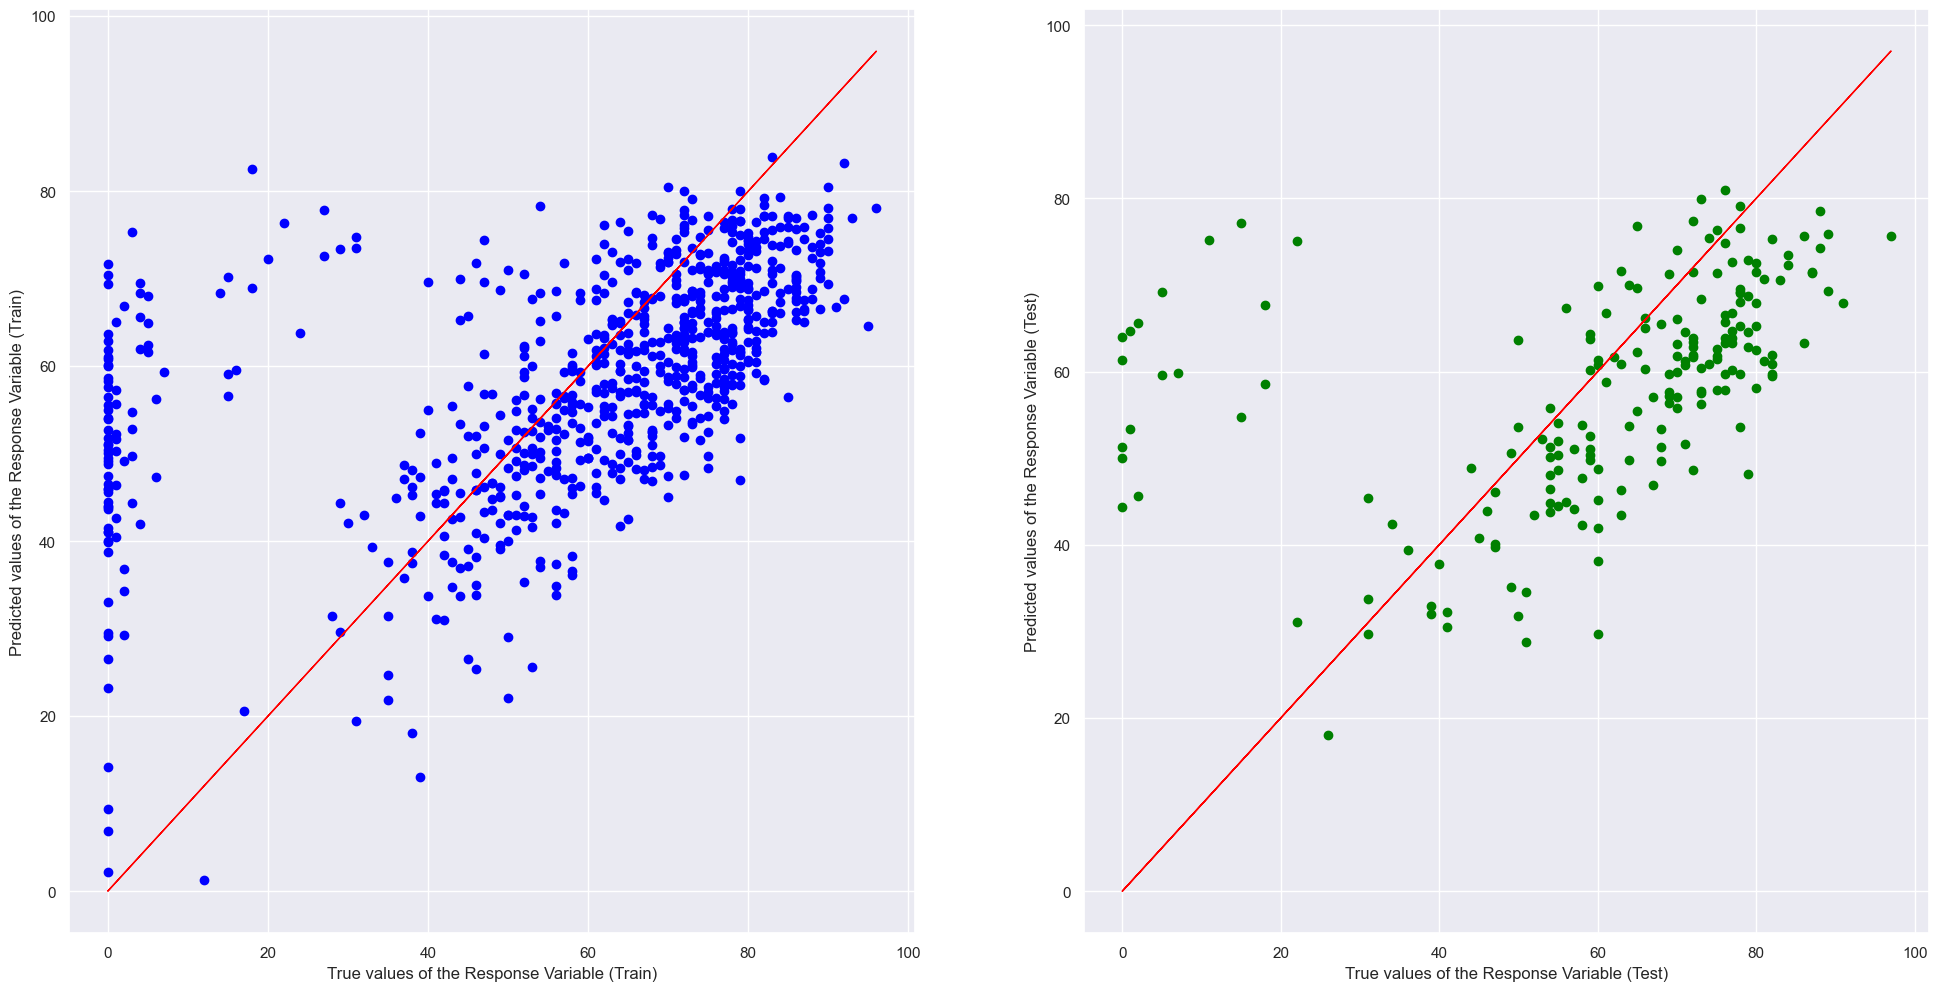

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.27373095632784394
Mean Squared Error (MSE) 	: 439.9950606091994

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.14243422480402435
Mean Squared Error (MSE) 	: 411.5673389683302



In [11]:
np.random.seed(0)

# Extract Response and Predictors
y = pd.DataFrame(clean_songsdata["track_pop"])
X = pd.DataFrame(clean_songsdata[["artist_pop", "danceability", "energy", "loudness", "key", "speechiness", "duration_ms", "Year"]])

train_test_data( X , y )

### Best model

We will now utilize the forward selection method to identify the optimal linear regression model for predicting the "track_pop" value, using Ordinary Least Squares (OLS). This method systematically adds variables to the model, selecting those that minimize the Akaike Information Criterion (AIC) at each step. This approach helps ensure that we include only the most statistically significant variables in the final model, aiming to enhance both the accuracy and interpretability of our predictions.

In [12]:
def forward_selection(data, response):
    # Initialize the set of all columns except the response variable
    remaining = set(data.columns)
    remaining.remove(response)

    # List to keep track of variables selected for the model
    selected = []

    # Initialize variables to keep track of the best AIC score
    current_score, best_new_score = float('inf'), float('inf')

    # Continue until no more variables can improve the model
    while remaining and current_score == best_new_score:
        scores_with_candidates = []

        # Test each candidate variable not in the model
        for candidate in remaining:
            # Create a formula string for the OLS model
            formula = "{} ~ {}".format(response, ' + '.join(selected + [candidate]))
            # Fit the model and compute the AIC
            score = sm.OLS.from_formula(formula, data).fit().aic
            scores_with_candidates.append((score, candidate))

        # Sort the list of scores --> The best one will be in index 0
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]

        # If the model improves, update the current model
        if current_score > best_new_score:
            remaining.remove(best_candidate)  
            selected.append(best_candidate)
            current_score = best_new_score 

    # Create the final model formula with all selected variables
    formula = "{} ~ {}".format(response, ' + '.join(selected))
    model = sm.OLS.from_formula(formula, data).fit() 
    return model


In [13]:
data = clean_songsdata.copy()
model = forward_selection(data, 'track_pop')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              track_pop   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     46.88
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           2.56e-57
Time:                        17:59:12   Log-Likelihood:                -4312.0
No. Observations:                 968   AIC:                             8640.
Df Residuals:                     960   BIC:                             8679.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3163.8004   1250.354     -2.530   

### Checking again the best model

Response Variable : **Track_pop**     
Predictor Feature : **Artist_pop, Danceability, Loudness, Key, Speechiness, Duration_ms, Year**       

$
\begin{aligned}
\text{Regression Model:} \quad \text{Track_pop } = & \ a_1 \times \text{Artist_pop} + a_2 \times \text{Danceability} + \\&+ a_3 \times \text{Loudness} + a_4 \times \text{Key} + a_5 \times \text{Speechiness} \\
&+ a_6 \times \text{Duration_ms} + a_7 \times \text{Year} + b
\end{aligned}
$




Intercept of Regression 	: b =  [-2186.4455973]
Coefficients of Regression 	: a =  [[ 5.82985824e-01 -6.45045281e+00  9.77187300e-01 -2.76862453e-01
  -1.37478976e+01  2.75154923e-05  1.09693343e+00]]

     Predictors  Coefficients
0    artist_pop      0.582986
1  danceability     -6.450453
2      loudness      0.977187
3           key     -0.276862
4   speechiness    -13.747898
5   duration_ms      0.000028
6          Year      1.096933



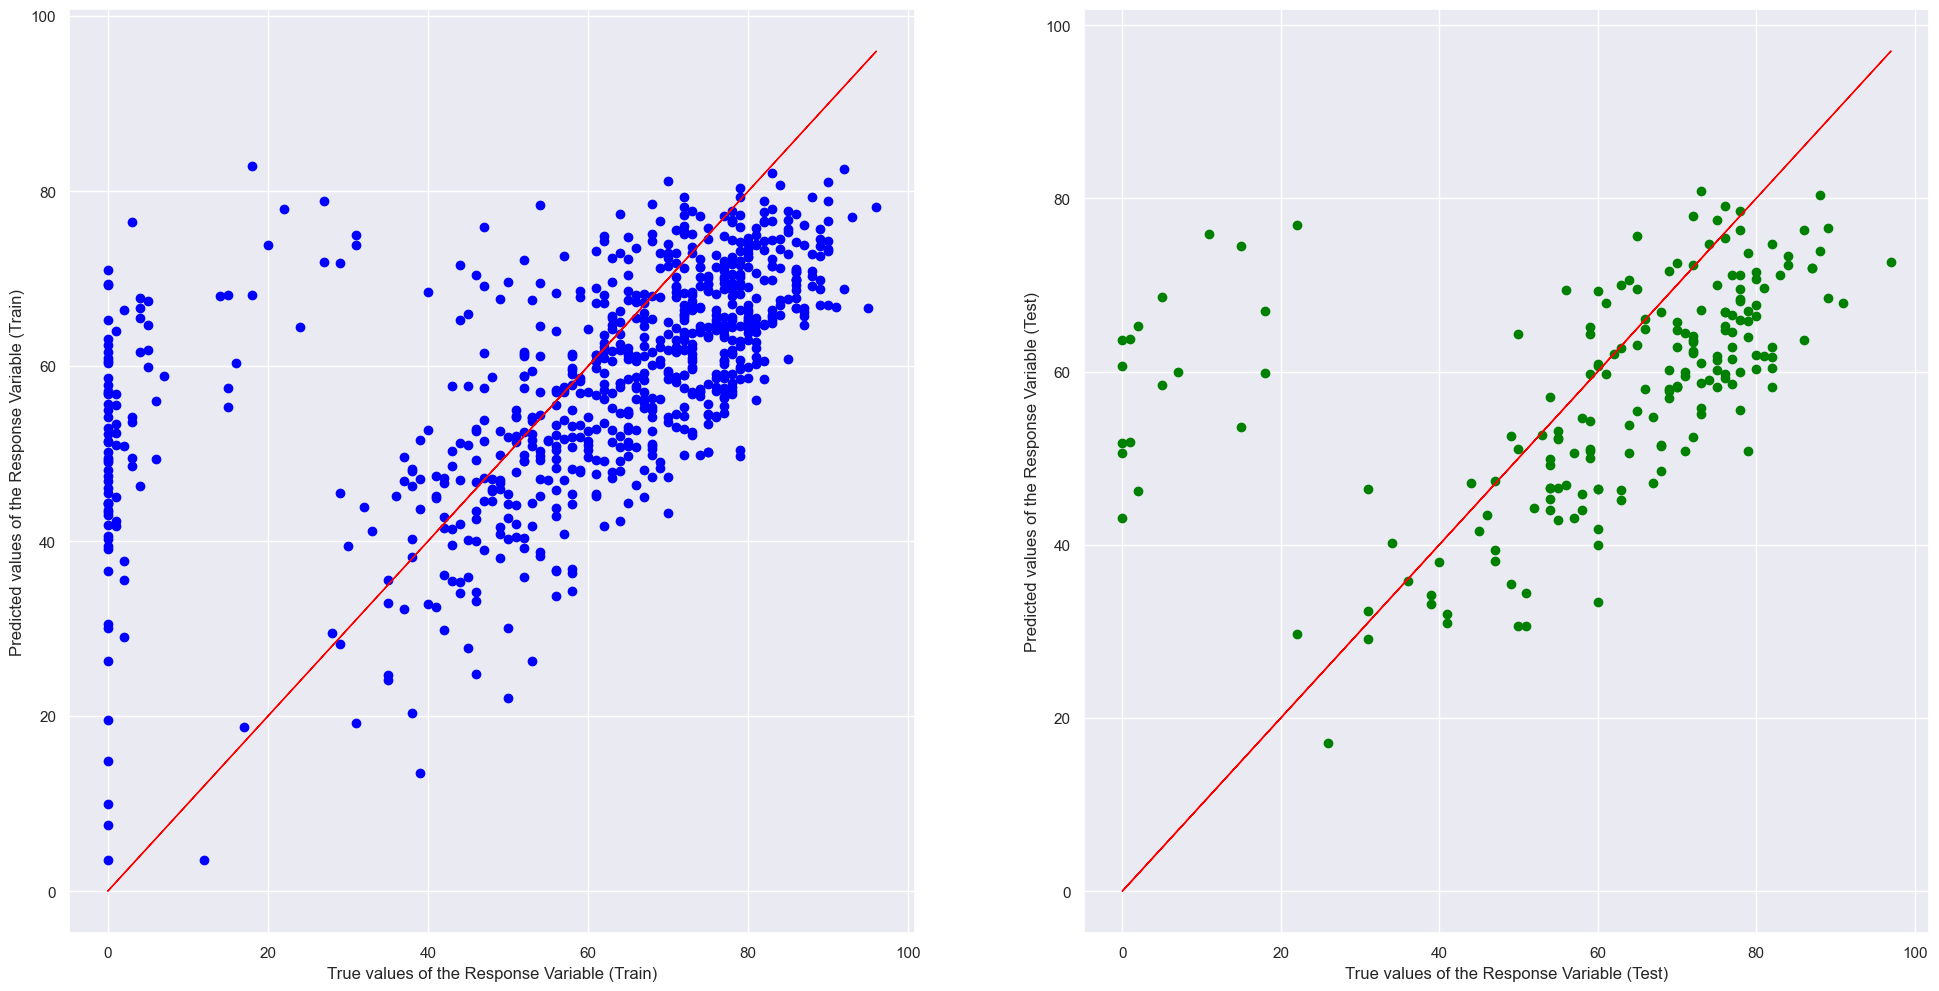

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2708366000536998
Mean Squared Error (MSE) 	: 441.74854642187785

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.15658494775357645
Mean Squared Error (MSE) 	: 404.77605186560703



In [14]:
np.random.seed(0)

# Extract Response and Predictors
y = pd.DataFrame(clean_songsdata["track_pop"])
X = pd.DataFrame(clean_songsdata[["artist_pop", "danceability", "loudness", "key", "speechiness", "duration_ms", "Year"]])

train_test_data( X , y )